Real Estate
Authored by: Prathibha Kandawala

<div class="usecase-duration"><b>Duration:</b> 60 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<div class="usecase-section-header">Scenario</div>

**Scenario:**
I am going to analyze the distribution and trends of dwelling numbers across different areas within the Melbourne city. This analysis will help me understand which areas have high or low dwelling numbers, identify any significant changes or patterns over time, and forecast future trends in dwelling numbers. By gaining insights into the spatial and temporal dynamics of dwelling numbers, I can make informed decisions about urban planning, resource allocation, and infrastructure development to meet the evolving needs of the city's residents.

<div class="usecase-section-header">What this use case will teach you</div> 

This use case will teach you:

1. How to analyze the distribution and trends of dwelling numbers across different areas within a city.
2. How to identify areas with high or low dwelling numbers using descriptive statistics such as mean, median, and standard deviation.
3. How to visualize the spatial distribution of dwelling numbers using geospatial analysis techniques.
4. How to perform correlation analysis to understand the relationships between dwelling numbers and other relevant variables.
5. How to use time series forecasting techniques to predict future trends in dwelling numbers based on historical data.

At the end of this use case i will

- Gain proficiency in analyzing and visualizing the distribution and trends of dwelling numbers.
- Learn how to use descriptive statistics to identify areas with high or low dwelling numbers.
- Understand how to perform geospatial analysis to visualize the spatial distribution of dwelling numbers across different areas.
- Develop skills in correlation analysis to explore relationships between dwelling numbers and other relevant variables.
- Acquire knowledge in time series forecasting techniques to predict future trends in dwelling numbers based on historical data.

<div class="usecase-section-header">Analyzing Economic Dynamics for Urban Development and Real Estate Planning</div>

In Melbourne, understanding dwelling numbers across different areas is crucial for urban planning, resource allocation, and socioeconomic analysis. This analysis aims to provide insights into dwelling distribution trends, identify areas with high or low dwelling numbers, and forecast future trends using time series techniques. The datasets used include floor space by block and industry and residential dwelling counts, sourced from the Melbourne City open data portal. These datasets offer comprehensive information on dwelling numbers and related industries, enabling a holistic analysis of Melbourne's urban landscape.


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load floor-space dataset


In [104]:
import pandas as pd
import requests
from io import StringIO

dataset_id = 'floor-space-by-block-by-clue-industry'
base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
apikey_file = "C:/Users/ASER/Documents/MOP Prath/API.txt"
format = 'csv'

with open(apikey_file, 'r') as file:
    apikey = file.read().strip()

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    floor_space = pd.read_csv(StringIO(url_content), delimiter=';')
    print(floor_space.sample(10, random_state=999))  # Test
else:
    print(f'Request failed with status code {response.status_code}')


       census_year  block_id               clue_small_area  accommodation  \
2533          2014       441  West Melbourne (Residential)            NaN   
3598          2009       919                     Parkville           0.00   
599           2019       736                     Southbank            NaN   
2801          2013      1004   West Melbourne (Industrial)           0.00   
283           2020       116               Melbourne (CBD)           0.00   
2109          2016       421  West Melbourne (Residential)           0.00   
8275          2021        15               Melbourne (CBD)       20594.18   
2158          2016       737                     Southbank           0.00   
10114         2022       224                       Carlton           0.00   
690           2018        91  West Melbourne (Residential)           0.00   

       admin_and_support_services  agriculture_and_mining  \
2533                         0.00                     0.0   
3598                         0

In [105]:
print("Shape of the dataset:", floor_space.shape)


Shape of the dataset: (12394, 24)


### Load residential dwellings dataset

In [106]:
import pandas as pd
import requests
from io import StringIO

dataset_id = 'residential-dwellings'
base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
apikey_file = "C:/Users/ASER/Documents/MOP Prath/API.txt"
format = 'csv'

with open(apikey_file, 'r') as file:
    apikey = file.read().strip()

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    residential_dwellings = pd.read_csv(StringIO(url_content), delimiter=';')
    print(residential_dwellings.sample(10, random_state=999))  # Test
else:
    print(f'Request failed with status code {response.status_code}')


        census_year  block_id  property_id  base_property_id  \
52936          2002       365       107512            107512   
164738         2002       861       108682            108682   
129892         2014       228       108217            108217   
6938           2004       862       109533            109533   
78980          2002       252       557294            557294   
60032          2019       356       621950            621950   
151863         2022       204       512723            512723   
44513          2006       214       560258            560258   
42587          2009       247       102672            102672   
17224          2010       904       556741            556741   

                              building_address  clue_small_area  \
52936     193 Peel Street NORTH MELBOURNE 3051  North Melbourne   
164738     20 St Martins Lane SOUTH YARRA 3141      South Yarra   
129892       252 Rathdowne Street CARLTON 3053          Carlton   
6938          42W Toorak Ro

In [107]:
print("Shape of the dataset:", residential_dwellings.shape)

Shape of the dataset: (198651, 11)


### Group residential dwelling dataset by 'Census year' and 'CLUE small area' and  count the unique 'Dwelling number'

In [108]:

# Group by 'Census year' and 'CLUE small area', then count the unique 'Dwelling number'
dwelling_count = residential_dwellings.groupby(['census_year', 'clue_small_area'])['dwelling_number'].nunique().reset_index()

# Rename the count column for clarity
dwelling_count.rename(columns={'Dwelling number': 'Dwelling count'}, inplace=True)

# Print the resulting table
print(dwelling_count)


     census_year               clue_small_area  dwelling_number
0           2002                       Carlton               54
1           2002                     Docklands                7
2           2002                East Melbourne               32
3           2002                    Kensington               24
4           2002               Melbourne (CBD)               77
..           ...                           ...              ...
242         2022                     Parkville               41
243         2022                Port Melbourne                1
244         2022                   South Yarra               34
245         2022                     Southbank               75
246         2022  West Melbourne (Residential)               57

[247 rows x 3 columns]


### Group floor space dataset  by 'Census year' and 'CLUE small area', and sum the occurrences of the specified column features for each group

In [110]:
import pandas as pd

# Load the dataset
#floor_space_data = pd.read_csv("floor-space-by-block-by-clue-industry.csv")

# List of column features to count
column_features = [
    'admin_and_support_services',
    'business_services',
    'education_and_training',
    'food_and_beverage_services',
    'health_care_and_social_assistance',
    'public_administration_and_safety',
    'real_estate_services',
    'rental_and_hiring_services',
    'retail_trade',
    'transport_postal_and_storage'
]

# Group by 'Census year' and 'CLUE small area', then sum the occurrences of the specified column features for each group
industry_counts = floor_space_data.groupby(['census_year', 'clue_small_area'])[column_features].sum().reset_index()

# Print the resulting table
print(industry_counts)



    census_year               clue_small_area  admin_and_support_services  \
0          2002                       Carlton                     3286.93   
1          2002     City of Melbourne (total)                   308267.24   
2          2002                     Docklands                    25527.96   
3          2002                East Melbourne                     3707.29   
4          2002                    Kensington                        0.00   
..          ...                           ...                         ...   
281        2022                Port Melbourne                    19232.39   
282        2022                   South Yarra                        0.00   
283        2022                     Southbank                    10809.59   
284        2022   West Melbourne (Industrial)                        0.00   
285        2022  West Melbourne (Residential)                        0.00   

     business_services  education_and_training  food_and_beverage_services 

### Merge the two datasets 

In [114]:
# Convert 'census_year' column to the same data type (int64) in both DataFrames
dwelling_count['census_year'] = dwelling_count['census_year'].astype(int)
industry_counts['census_year'] = industry_counts['census_year'].astype(int)

# Merge dwelling_count and industry_counts on 'Census year' and 'CLUE small area'
combined_data = pd.merge(dwelling_count, industry_counts, on=['census_year', 'clue_small_area'], how='outer')

# Print the resulting combined table
print(combined_data)



     census_year              clue_small_area  dwelling_number  \
0           2002                      Carlton             54.0   
1           2002                    Docklands              7.0   
2           2002               East Melbourne             32.0   
3           2002                   Kensington             24.0   
4           2002              Melbourne (CBD)             77.0   
..           ...                          ...              ...   
281         2020    City of Melbourne (total)              NaN   
282         2020  West Melbourne (Industrial)              NaN   
283         2021    City of Melbourne (total)              NaN   
284         2021  West Melbourne (Industrial)              NaN   
285         2022  West Melbourne (Industrial)              NaN   

     admin_and_support_services  business_services  education_and_training  \
0                       3286.93           33408.72                90988.41   
1                      25527.96             471.14 

### Drop rows with missing values from the combined_data DataFrame

In [115]:
#since the missing values in dwelling number column are  "Total value" and "industrial zones" we can drop the rows
# Drop rows with missing values from the combined_data DataFrame
combined_data = combined_data.dropna()

# Print the shape of the cleaned DataFrame to see how many rows were dropped
print("Shape of cleaned DataFrame after dropping missing values:", combined_data.shape)

Shape of cleaned DataFrame after dropping missing values: (247, 13)


### Plot total dwelling number per area over time

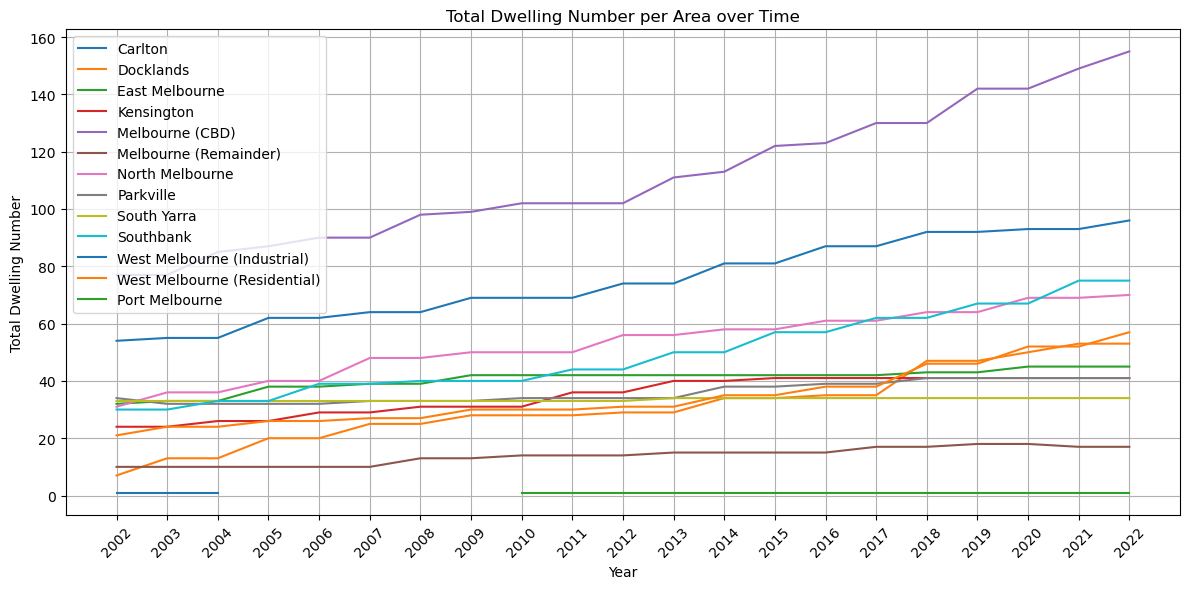

In [123]:
# Group by 'census_year' and 'clue_small_area', then sum 'dwelling_number' within each group
total_dwelling_per_area_year = combined_data.groupby(['census_year', 'clue_small_area'])['dwelling_number'].sum()

# Convert the resulting Series to a DataFrame
total_dwelling_per_area_year_df = total_dwelling_per_area_year.reset_index()

import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))

for area in total_dwelling_per_area_year_df['clue_small_area'].unique():
    area_data = total_dwelling_per_area_year_df[total_dwelling_per_area_year_df['clue_small_area'] == area]
    plt.plot(area_data['census_year'], area_data['dwelling_number'], label=area)

plt.title('Total Dwelling Number per Area over Time')
plt.xlabel('Year')
plt.ylabel('Total Dwelling Number')
plt.legend()
plt.grid(True)

# Set integer years on the x-axis
plt.xticks(total_dwelling_per_area_year_df['census_year'].unique(), rotation=45)

plt.tight_layout()
plt.show()




### Correlation Analysis
#### Explore the correlation between dwelling numbers and other variables in the dataset to understand their relationships.

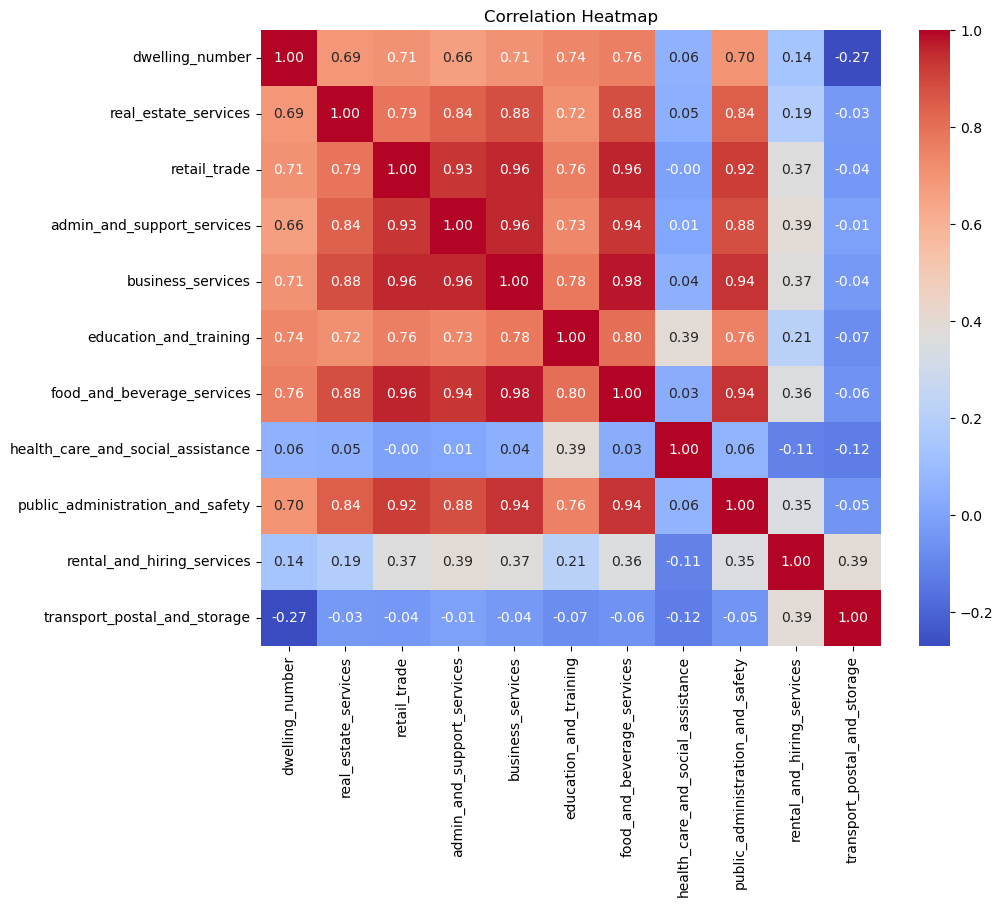

In [130]:
import pandas as pd

# Select relevant columns for correlation analysis
columns_of_interest = ['dwelling_number', 'real_estate_services', 'retail_trade', 'other_variable1', 'other_variable2', ...]

columns_of_interest = ['dwelling_number', 'real_estate_services', 'retail_trade', 'admin_and_support_services', 'business_services', 'education_and_training', 'food_and_beverage_services', 'health_care_and_social_assistance', 'public_administration_and_safety', 'rental_and_hiring_services', 'transport_postal_and_storage']
relevant_df = combined_data[columns_of_interest]
# Calculate correlation matrix
correlation_matrix = relevant_df.corr()

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



- Dwelling numbers have a strong positive correlation with real estate services (0.69), retail trade (0.71), admin and support services (0.66), business services (0.71), education and training (0.74), food and beverage services (0.76), and public administration and safety (0.70).

- There's also a moderate positive correlation with rental and hiring services (0.14).

- Dwelling numbers have a weak positive correlation with health care and social assistance (0.06).

- There's a negative correlation between dwelling numbers and transport, postal, and storage services (-0.27), indicating that as dwelling numbers increase, the usage of these services tends to decrease.



### Compare the dwelling numbers between different areas to identify areas with high or low dwelling numbers using descriptive statistics


In [131]:

# Group by 'clue_small_area' and calculate descriptive statistics
area_stats = combined_data.groupby('clue_small_area')['dwelling_number'].agg(['mean', 'median', 'std'])

# Identify areas with high or low dwelling numbers based on mean, median, and standard deviation
high_dwellings = area_stats[area_stats['mean'] > area_stats['mean'].quantile(0.75)]
low_dwellings = area_stats[area_stats['mean'] < area_stats['mean'].quantile(0.25)]

# Print or visualize the results
print("Areas with High Dwelling Numbers:")
print(high_dwellings)
print("\nAreas with Low Dwelling Numbers:")
print(low_dwellings)


Areas with High Dwelling Numbers:
                       mean  median        std
clue_small_area                               
Carlton           74.904762    74.0  14.067355
Melbourne (CBD)  110.761905   102.0  23.763217
North Melbourne   53.095238    56.0  11.652917

Areas with Low Dwelling Numbers:
                                  mean  median       std
clue_small_area                                         
Melbourne (Remainder)        13.904762    14.0  2.913842
Port Melbourne                1.000000     1.0  0.000000
West Melbourne (Industrial)   1.000000     1.0  0.000000


The analysis shows areas with high and low dwelling numbers:

**Areas with High Dwelling Numbers:**
- **Carlton:** Mean dwelling number of approximately 74.9, with a median of 74 and a standard deviation of around 14.
- **Melbourne (CBD):** Mean dwelling number of approximately 110.8, with a median of 102 and a standard deviation of around 23.8.
- **North Melbourne:** Mean dwelling number of approximately 53.1, with a median of 56 and a standard deviation of around 11.7.

**Areas with Low Dwelling Numbers:**
- **Melbourne (Remainder):** Mean dwelling number of approximately 13.9, with a median of 14 and a standard deviation of around 2.9.
- **Port Melbourne:** Only 1 dwelling in this area.
- **West Melbourne (Industrial):** Only 1 dwelling in this area.

